# CASIA Notebook

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np 
import glob
import os
from os.path import isfile, join
import soundfile as sf 
import sys
import librosa 
import librosa.display
import seaborn as sbn
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from IPython.display import Audio
import scipy.io.wavfile
from scipy.fftpack import dct
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

In [22]:
# Folder path
CasiaData = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/CASIA/6/"

In [23]:
# Extract data
fileEmotion = []
filePath = []
CasiaList = os.listdir(CasiaData)
for dir in CasiaList: # extract files for each actor
    path = CasiaData + dir
    emotionList = os.listdir(path)
    for x in emotionList:
        filePath.append(CasiaData + dir + '/' + x)
        fileEmotion.append(x[4:6])
dfEmotion = pd.DataFrame(fileEmotion, columns=['Emotions'])
dfPath = pd.DataFrame(filePath, columns=['Path'])
dfCasia = pd.concat([dfEmotion, dfPath], axis=1)
dfPath = pd.concat([dfCasia], axis = 0)
#dfPath.to_csv("data_path.csv",index=False)
dfPath.head()

#renaming integers to emotions
dfCasia.Emotions.replace({'an':'Anger', 'fe':'Fear', 'ha':'Happy', 'ne':'Neutral', 'sa':'Sadness', 'su':'Surprise'}, inplace=True)
dfCasia[dfCasia['Emotions'].str.contains("St")==False]
dfCasia[~dfCasia.Path.str.contains('|'.join(["DS_Store"]))]

,Emotions,Path
1,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
2,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
3,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
4,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
5,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
...,...,...
1201,Surprise,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
1202,Surprise,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
1203,Surprise,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
1204,Surprise,C:/Users/Lenovo/Documents/3rd Year Project/Dat...


In [24]:
# Remove nonWAV files
dfCasia= dfCasia[~dfCasia['Path'].str.contains('DS_Store')]
dfCasia_filtered

,Emotions,Path
1,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
2,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
3,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
4,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
5,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
...,...,...
1201,Surprise,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
1202,Surprise,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
1203,Surprise,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
1204,Surprise,C:/Users/Lenovo/Documents/3rd Year Project/Dat...


In [41]:
# Count number of files
dfCasia['Emotions'].value_counts()

Anger       200
Fear        200
Happy       200
Neutral     200
Sadness     200
Surprise    200
St            6
Name: Emotions, dtype: int64

In [49]:
# Get file durations and labels 
fileDuration = 0
fileDuration = []
count = 0
label = []
path1 = []

for i in range(len(dfCasia)):
    if dfCasia['Emotions'][i] == 'Happy':
        x = dfCasia['Emotions'][i]
        y = dfCasia['Path'][i]
        signal, sr = librosa.load(y)
        label.append(x)
        path1.append(y)
        fileDuration.append(len(signal))
    elif dfCasia['Emotions'][i] == 'Sadness':
        x = dfCasia['Emotions'][i]
        y = dfCasia['Path'][i]
        signal, sr = librosa.load(y)
        label.append(x)
        path1.append(y)
        fileDuration.append(len(signal))
    elif dfCasia['Emotions'][i] == 'Anger':
        x = dfCasia['Emotions'][i]
        y = dfCasia['Path'][i]
        signal, sr = librosa.load(y)
        label.append(x)
        path1.append(y)
        fileDuration.append(len(signal))
    elif dfCasia['Emotions'][i] == 'Neutral':
        x = dfCasia['Emotions'][i]
        y = dfCasia['Path'][i]
        signal, sr = librosa.load(y)
        label.append(x)
        path1.append(y)
        fileDuration.append(len(signal))
        

In [50]:
# Create a new dataframe of the shortened data
dfCasia_shortened = pd.DataFrame(
    {'Label': label,
     'Path': path1,
     'Duration': fileDuration
    })
dfCasia_shortened

,Label,Path,Duration
0,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,39470
1,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,30826
2,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,27817
3,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,53732
4,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,36180
...,...,...,...
795,Sadness,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,76751
796,Sadness,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,63557
797,Sadness,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,43560
798,Sadness,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,57337


Anger      200
Happy      200
Neutral    200
Sadness    200
Name: Label, dtype: int64

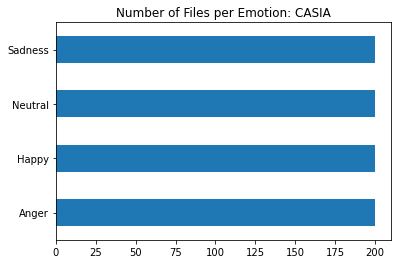

In [51]:
# Find the distribution of files
distribution = dfCasia_shortened['Label'].value_counts().plot(kind='barh', title='Number of Files per Emotion: CASIA')
dfCasia_shortened['Label'].value_counts()

In [54]:
# Find the distribution of file lengths
avgDuration = sum(dfCasia_shortened['Duration'])/len(dfCasia_shortened['Duration'])
minDuration = min(dfCasia_shortened['Duration'])
maxDuration = max(dfCasia_shortened['Duration'])
print(avgDuration/sr)
print(minDuration/sr)
print(maxDuration/sr)
dfCasia_shortened["Duration_sec"] = dfCasia_shortened['Duration']/sr 

1.9101506802721089
0.9556916099773243
4.933514739229025


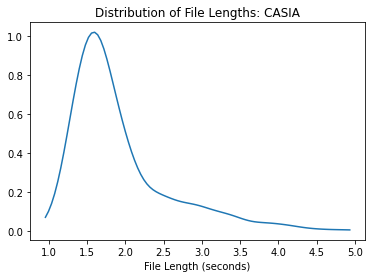

80.0% of files have a length shorter than 2.28 seconds.


In [56]:
# Plot the distribution of file lengths
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

pdf = gaussian_kde(dfCasia_shortened['Duration_sec'])#, bins = 30)#.plot(kind='kde', title="Distribution of File Lengths: EmoDB")
x = np.linspace(dfCasia_shortened['Duration_sec'].min(), dfCasia_shortened['Duration_sec'].max(), 100)
plt.plot(x,pdf(x))
plt.xlabel("File Length (seconds)")
plt.title("Distribution of File Lengths: CASIA")
plt.show()

cdf = dfCasia_shortened['Duration_sec'].value_counts(normalize=True).sort_index().cumsum()

threshold = 0.80
point = cdf[cdf <= threshold].index.max()
print(f"{threshold*100}% of files have a length shorter than {point:.2f} seconds.")

In [67]:
dfCasia_shortened

,Label,Path,Duration,Duration_sec
0,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,39470,1.790023
1,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,30826,1.398005
2,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,27817,1.261542
3,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,53732,2.436825
4,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,36180,1.640816
...,...,...,...,...
795,Sadness,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,76751,3.480771
796,Sadness,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,63557,2.882404
797,Sadness,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,43560,1.975510
798,Sadness,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,57337,2.600317


In [77]:
setfileDuration = 2.28*sr # set file duration to 2.28 seconds
for i in range(len(dfCasia_shortened)):
    signal, sr = librosa.load(dfCasia_shortened['Path'][i])
    if dfCasia_shortened['Label'][i] == 'Anger':
        path_name = dfCasia_shortened['Path'][i][65:]
    elif dfCasia_shortened['Label'][i] == 'Happy':
        path_name = dfCasia_shortened['Path'][i][65:]
    elif dfCasia_shortened['Label'][i] == 'Sadness':
        path_name = dfCasia_shortened['Path'][i][63:]
    elif dfCasia_shortened['Label'][i] == 'Neutral':
        path_name = dfCasia_shortened['Path'][i][67:]
    savePath = 'C:/Users/Lenovo/Documents/3rd Year Project/Dataset/CASIA_Baseline/'+ path_name
    if fileDuration != setfileDuration :
        # crop soundwave 
        trimmedFiles = librosa.util.fix_length(signal, int(setfileDuration))
        soundfile.write(savePath, trimmedFiles, sr)
        count = count + 1
    else:
        soundfile.write(savePath, signal, sr)
        count = count + 1

In [3]:
# Extract MFCC Features
import librosa
from os import listdir
from os.path import isfile, join
import numpy as np
data = []
label = []
fixed_frames = 259
filePath = 'C:/Users/Lenovo/Documents/3rd Year Project/Dataset/CASIA_Baseline/'
#"C:\Users\Lenovo\Documents\3rd Year Project\Dataset\CASIA_Shortened\201-angry-liuchanhg.wav"
files = [f for f in listdir(filePath) if isfile(join(filePath, f))]
for x in files:
    #print(filePath + x)
    signal, sr = librosa.load((filePath + x), sr=None)
    mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
    if mfcc.shape[1] < fixed_frames:
        mfcc = np.pad(mfcc, ((0, 0), (0, fixed_frames - mfcc.shape[1])), mode='constant')
    else:
        mfcc = mfcc[:, :fixed_frames]
    data.append(mfcc)
    label.append(x[4])
data = np.array(data)
data.shape

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00170898 -0.00195312 -0.00170898 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.0007019  -0.00100708 -0.00091553 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00119019 -0.00186157 -0.00170898 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_l

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00085449 -0.00125122 -0.00119019 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00326538 -0.00482178 -0.00457764 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00198364 -0.00219727 -0.00189209 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_l

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00097656 -0.0015564  -0.00152588 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00308228 -0.00476074 -0.00448608 ... -0.00415039 -0.00408936
 -0.00418091] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.0012207  -0.00189209 -0.00186157 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 204

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00106812 -0.0017395  -0.00158691 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00149536 -0.00238037 -0.00231934 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00091553 -0.00143433 -0.00134277 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_l

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00131226 -0.00204468 -0.00195312 ... -0.00332642 -0.00344849
 -0.00354004] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00057983 -0.00088501 -0.00091553 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00106812 -0.00164795 -0.00161743 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 204

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00076294 -0.00119019 -0.00112915 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00112915 -0.00164795 -0.00164795 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00146484 -0.0022583  -0.00201416 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_l

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00137329 -0.00228882 -0.00234985 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00286865 -0.00457764 -0.0045166  ... -0.00424194 -0.00424194
 -0.00424194] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00109863 -0.00183105 -0.00189209 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 204

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00134277 -0.00204468 -0.00183105 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00076294 -0.00128174 -0.0015564  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-3.0517578e-05  4.5776367e-04  5.7983398e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(s

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00341797 -0.00524902 -0.00500488 ...  0.0057373   0.01098633
  0.01263428] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00189209 -0.00219727 -0.00192261 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00128174 -0.00204468 -0.00204468 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 204

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00143433 -0.00216675 -0.0020752  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00131226 -0.00198364 -0.00183105 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00317383 -0.00491333 -0.00469971 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_l

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.0012207  -0.00192261 -0.00189209 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00128174 -0.00192261 -0.00170898 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.0012207  -0.00198364 -0.00186157 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_l

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00161743 -0.00189209 -0.00170898 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.0007019  -0.00088501 -0.00073242 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00088501 -0.00241089 -0.00323486 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_l

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00027466 -0.0010376  -0.00057983 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00082397 -0.00112915 -0.0010376  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00436401 -0.00668335 -0.00631714 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_l

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00119019 -0.00210571 -0.00213623 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00271606 -0.00418091 -0.00408936 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00134277 -0.00210571 -0.0020752  ... -0.00146484 -0.00125122
 -0.00115967] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 204

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00115967 -0.0017395  -0.00170898 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00094604 -0.00137329 -0.00131226 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00106812 -0.0017395  -0.0017395  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_l

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00158691 -0.00265503 -0.00219727 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00369263 -0.00570679 -0.00564575 ...  0.05389404  0.05404663
  0.05664062] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00137329 -0.00131226 -0.0010376  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 204

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00140381 -0.00213623 -0.00195312 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00158691 -0.00259399 -0.00256348 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00085449 -0.00125122 -0.00119019 ... -0.00210571 -0.00222778
 -0.0022583 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 204

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00274658 -0.00411987 -0.00390625 ... -0.00759888 -0.00732422
 -0.00720215] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00186157 -0.00210571 -0.00177002 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00076294 -0.00137329 -0.00143433 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 204

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00140381 -0.00216675 -0.00198364 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00302124 -0.00463867 -0.00439453 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00134277 -0.0020752  -0.00183105 ... -0.00146484 -0.00140381
 -0.00134277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 204

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00112915 -0.00244141 -0.00250244 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00338745 -0.00531006 -0.00515747 ...  0.07315063  0.0793457
  0.08447266] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00137329 -0.00213623 -0.00213623 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.0012207  -0.00134277 -0.00067139 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00109863 -0.00180054 -0.00177002 ...  0.07513428  0.09603882
  0.13848877] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[0.00064087 0.00109863 0.00106812 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 20

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00061035 -0.00094604 -0.00085449 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00082397 -0.00137329 -0.00149536 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00338745 -0.00534058 -0.00509644 ...  0.03335571  0.03424072
  0.03692627] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 204

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00366211 -0.00561523 -0.00540161 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00021362 -0.00027466 -0.00061035 ...  0.00167847  0.00177002
  0.0017395 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.0015564  -0.00250244 -0.00250244 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 204

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00079346 -0.0012207  -0.00128174 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00137329 -0.00213623 -0.00222778 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00317383 -0.00506592 -0.00488281 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_l

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00143433 -0.0022583  -0.00204468 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.0007019  -0.00094604 -0.00091553 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00219727 -0.00323486 -0.00296021 ... -0.07901001 -0.07907104
 -0.0791626 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 204

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00149536 -0.00231934 -0.00228882 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00091553 -0.00192261 -0.00210571 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00106812 -0.00161743 -0.00146484 ... -0.0020752  -0.00201416
 -0.00192261] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 204

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00112915 -0.0017395  -0.0017395  ...  0.06204224  0.06295776
  0.06417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00158691 -0.00247192 -0.00228882 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00112915 -0.00183105 -0.00180054 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 204

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00274658 -0.00427246 -0.00427246 ... -0.01885986 -0.03082275
 -0.0206604 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.0012207  -0.00186157 -0.0017395  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00177002 -0.00234985 -0.00167847 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 204

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00256348 -0.00402832 -0.00387573 ... -0.00976562 -0.01382446
 -0.01605225] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.00039673 -0.00106812 -0.00112915 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11908\2062758617.py:14: FutureWarning: Pass y=[-0.0010376  -0.00164795 -0.00161743 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft = 204

(800, 18, 259)

In [84]:
# Relabel emotions numerically
for i in range(len(label)):
    if label[i] == 'h':
        label[i] = 0;
    elif label[i] == 's':
        label[i] = 1;
    elif label[i] == 'a':
        label[i] = 2;
    elif label[i] == 'n':
        label[i] = 3;

In [89]:
# Split data for training and testing 80/20
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size = 0.2)

In [90]:
# Convert data to np arrays
X_train = np.array(x_train)
X_test = np.array(x_test)
Y_train = np.array(y_train)
Y_test = np.array(y_test)
print(X_test.shape)
print(type(Y_test))

(160, 18, 259)
<class 'numpy.ndarray'>


In [91]:
# CNN
model = Sequential()
from keras.layers import BatchNormalization
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(18, 259, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=4, activation='softmax'))

In [4]:
# Train and test
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=32 , epochs=24 , verbose=1, validation_data=(X_test, Y_test))

NameError: name 'model' is not defined

In [93]:
best_val_acc = 0.0
best_epoch = None
num_epochs = 5
count = 0
Epoch_list = [1, 2 ,3,4,5,6, 8, 10, 14, 16, 18, 20, 24]
HistoryData = []
Val_loss_Data = []
Val_Acc_Data = []
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
for Loop_Var in Epoch_list:
    # Train the model for one epoch
    history = model.fit(X_train, Y_train, batch_size=32 , epochs=Loop_Var , verbose=1, validation_data=(X_test, Y_test))
    HistoryData.append(history)

    # Evaluate the model on the validation set
    val_loss, val_acc = model.evaluate(X_test, Y_test, batch_size=32, verbose=1)
    Val_loss_Data.append(val_loss)
    Val_Acc_Data.append(val_acc)

    # Check if this epoch had the best validation accuracy so far
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_epoch = Loop_Var
        # Save the model weights for the best epoch
        model.save_weights('best_model_weights.h5')
    count = count + 1
    print(count)
print('Loop Completed')
# Load the weights for the best epoch
model.load_weights('best_model_weights.h5')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=32, verbose=1)

print("Best epoch: {} with validation accuracy: {}".format(best_epoch, best_val_acc))
print("Test loss: {} Test accuracy: {}".format(test_loss, test_acc))

5/5 [==============================] - 6s 1s/step - loss: 122.9534 - accuracy: 0.2313
1
Epoch 1/2
20/20 [==============================] - 115s 6s/step - loss: 0.6504 - accuracy: 0.7453 - val_loss: 55.8485 - val_accuracy: 0.2313
Epoch 2/2
5/5 [==============================] - 6s 1s/step - loss: 27.5582 - accuracy: 0.2313
2
Epoch 1/3
20/20 [==============================] - 100s 5s/step - loss: 0.3682 - accuracy: 0.8609 - val_loss: 12.6216 - val_accuracy: 0.2375
Epoch 2/3
20/20 [==============================] - 89s 4s/step - loss: 0.2890 - accuracy: 0.8891 - val_loss: 5.6355 - val_accuracy: 0.2875
Epoch 3/3
5/5 [==============================] - 3s 612ms/step - loss: 6.3920 - accuracy: 0.4437
3
Epoch 1/4
20/20 [==============================] - 86s 4s/step - loss: 0.2170 - accuracy: 0.9203 - val_loss: 4.2905 - val_accuracy: 0.3250
Epoch 2/4
20/20 [==============================] - 100s 5s/step - loss: 0.1476 - accuracy: 0.9359 - val_loss: 2.7103 - val_accuracy: 0.4938
Epoch 3/4
20/20 

Epoch 3/24
20/20 [==============================] - 43s 2s/step - loss: 0.0176 - accuracy: 0.9953 - val_loss: 1.3250 - val_accuracy: 0.6875
Epoch 4/24
20/20 [==============================] - 43s 2s/step - loss: 0.0089 - accuracy: 0.9984 - val_loss: 0.9424 - val_accuracy: 0.7563
Epoch 5/24
20/20 [==============================] - 43s 2s/step - loss: 0.0129 - accuracy: 0.9953 - val_loss: 1.9501 - val_accuracy: 0.6938
Epoch 6/24
20/20 [==============================] - 43s 2s/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 1.0413 - val_accuracy: 0.7563
Epoch 7/24
20/20 [==============================] - 43s 2s/step - loss: 0.0289 - accuracy: 0.9953 - val_loss: 0.8790 - val_accuracy: 0.7688
Epoch 8/24
20/20 [==============================] - 43s 2s/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.8215 - val_accuracy: 0.8062
Epoch 9/24
20/20 [==============================] - 43s 2s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.8272 - val_accuracy: 0.8062
Epoch 10/24
20/20 [=

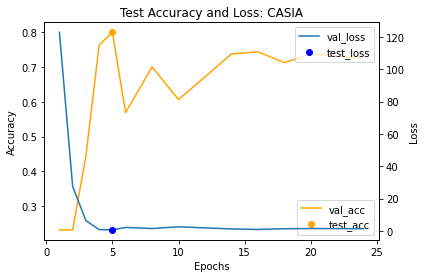

In [95]:
# Plot the test loss and accuracy
fig, ax1 = plt.subplots()
ax1.plot(Epoch_list, Val_Acc_Data, label='val_acc', color='orange')
ax1.plot(best_epoch, test_acc, 'o', label='test_acc', color='orange')
ax1.legend()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Test Accuracy and Loss: CASIA')
ax2 =ax1.twinx()
ax2.plot(Epoch_list, Val_loss_Data, label='val_loss')
ax2.plot(best_epoch, test_loss, 'o', label='test_loss', color='blue')
ax2.legend()
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
plt.show()
